# Hypothesis Testing

## Basics

In [8]:

import torch
import pandas as pd
from tqdm import tqdm

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/games.csv') #had to add
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
player_play_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')

In [4]:
eccentricity_df3_ = torch.load('/kaggle/input/eccentricity3/eccentricity_df3 - Copy (3).pth')
eccentricity_df3=eccentricity_df3_.copy()

<ipython-input-4-d1c9b612ca30>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eccentricity_df3_ = torch.load('/kaggle/input/eccentricity3/eccentricity_df3 - Copy (3).pth')

In [9]:
# Create a copy of eccentricity_df to add the new column
eccentricity_df3['isOffense'] = None

# Create a dictionary for quicker lookups of possessionTeam
# possession_team_dict = play_df.set_index(['gameId', 'playId'])['possessionTeam'].to_dict()
possession_team_dict = plays_df.set_index(['gameId', 'playId'])['possessionTeam'].to_dict()

# Create a dictionary for quicker lookups of teamAbbr
# team_abbr_dict = player_play.set_index(['gameId', 'playId', 'nflId'])['teamAbbr'].to_dict()
team_abbr_dict = player_play_df.set_index(['gameId', 'playId', 'nflId'])['teamAbbr'].to_dict()

# Iterate through eccentricity_df with tqdm for progress tracking
for idx, row in tqdm(eccentricity_df3.iterrows(), total=eccentricity_df3.shape[0], desc="Processing Players"):
    gameId = row['gameId']
    playId = row['playId']
    nflId = row['nflId']
    
    # Get possessionTeam and teamAbbr for the current player
    possession_team = possession_team_dict.get((gameId, playId))
    team_abbr = team_abbr_dict.get((gameId, playId, nflId))
    
    # Determine if the player is on the offense team
    if possession_team and team_abbr:
        eccentricity_df3.at[idx, 'isOffense'] = (team_abbr == possession_team)

# Convert 'isOffense' column to boolean type for clarity
eccentricity_df3['isOffense'] = eccentricity_df3['isOffense'].astype(bool)



Processing Players: 100%|██████████| 354574/354574 [00:29<00:00, 12062.03it/s]


In [28]:
eccentricity_df3.head()

,gameId,playId,nflId,routeRan,rushingYards,hadRushAttempt,disp,week,quarter,down,arxy,ars,ara,pos,eccentricity,eccentricity_s,eccentricity_a,theta_,theta_s,theta_a,eccentricity_extended,eccentricity_extended_s,eccentricity_extended_a,a,b,c,d,e,f,passingYards,wasRunningRoute,isOffense
0,2022090800,56,35472.0,NaN,0.0,0.0,"tensor(4.5300, dtype=torch.float64)",1.0,1.0,1.0,23.659186,15.127751,7.373766,G,23.659186,15.127751,0.135616,tensor(-1.2953),tensor(-1.4995),tensor(-0.4990),1.020915,0.966383,0.929723,0.012135,-0.189953,0.321264,1.0,0.992945,1.000334,0.0,NaN,True
1,2022090800,56,42392.0,NaN,0.0,0.0,"tensor(4.1800, dtype=torch.float64)",1.0,1.0,1.0,17.323187,529.009809,39.858934,C,17.323187,529.009809,39.858934,tensor(-1.1194),tensor(-1.4062),tensor(-1.4248),1.028458,0.999054,0.987376,0.044535,-0.257604,0.247774,1.0,0.966592,0.998606,0.0,NaN,True
2,2022090800,56,42489.0,IN,0.0,0.0,"tensor(29.4200, dtype=torch.float64)",1.0,1.0,1.0,1.991547,109.545803,42.435983,WR,0.502122,109.545803,0.023565,tensor(-1.0202),tensor(-0.0996),tensor(1.4918),0.705605,0.995425,0.988147,-0.011972,-0.006154,-0.008849,1.0,0.986600,0.999755,0.0,1.0,True
3,2022090800,56,44875.0,NaN,0.0,0.0,"tensor(5.5400, dtype=torch.float64)",1.0,1.0,1.0,31.189303,2.334005,8.719054,T,31.189303,0.428448,0.114691,tensor(-1.2868),tensor(0.9653),tensor(1.2265),1.015905,1.195177,1.055789,0.019056,-0.216018,0.357523,1.0,0.946301,0.997092,0.0,NaN,True
4,2022090800,56,44985.0,OUT,0.0,0.0,"tensor(13.0500, dtype=torch.float64)",1.0,1.0,1.0,3.700939,10.654117,16.134578,WR,0.270202,10.654117,0.061979,tensor(0.2789),tensor(0.0551),tensor(1.0336),0.854282,1.045878,0.968515,-0.015612,0.018528,-0.045305,1.0,0.986121,0.999325,0.0,1.0,True


In [100]:
eccentricity_df.loc[:, 'routeRan'] = eccentricity_df['routeRan'].fillna('NoRoute')

In [66]:
eccentricity_df['routeRan'].value_counts(dropna=False)

routeRan
NoRoute    134518
GO           7804
HITCH        6296
FLAT         6206
OUT          4291
CROSS        4219
IN           3372
POST         2701
SLANT        2293
CORNER       1840
SCREEN       1802
ANGLE        1725
WHEEL         220
Name: count, dtype: int64

## Hypothesis Testing for WasRunningRoutes

In [67]:
eccentricity_df.loc[:, 'wasRunningRoute'] = eccentricity_df['wasRunningRoute'].fillna(0)

In [69]:
eccentricity_df['wasRunningRoute'].value_counts(normalize=True)

wasRunningRoute
0.0    0.758758
1.0    0.241242
Name: proportion, dtype: float64

For Week 6 : Descriptive Statistics

In [70]:
# overall

eccentricity_df_6 = eccentricity_df[eccentricity_df['week'] == 6]


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_6 = eccentricity_df_6.groupby(['wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)

print("\n wasRunningRoute vs Aspect Ratio stats for week 6 \n")
print(ar_stats_week_6)
print()


 wasRunningRoute vs Aspect Ratio stats for week 6 

                      mean    median          std  count
wasRunningRoute                                         
0.0              60.078102  7.994839  1545.229004  14033
1.0              22.711131  1.454435   205.496819   4634



In [71]:
# week-wise


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_6 = eccentricity_df_6.groupby(['week', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'
)

print("\n wasRunningRoute vs Aspect Ratio stats for week 6 \n")
print(ar_stats_week_6)
print()


 wasRunningRoute vs Aspect Ratio stats for week 6 

                           mean    median          std  count
week wasRunningRoute                                         
6.0  0.0              60.078102  7.994839  1545.229004  14033
     1.0              22.711131  1.454435   205.496819   4634



In [72]:
# week-quarter wise

ar_stats_week_6 = eccentricity_df_6.groupby(['week','quarter', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'
)


print("\n wasRunningRoute vs Aspect Ratio stats for week 6 \n")
print(ar_stats_week_6)
print()


 wasRunningRoute vs Aspect Ratio stats for week 6 

                                   mean     median          std  count
week quarter wasRunningRoute                                          
6.0  1.0     0.0              38.929858   7.045938   368.363387   3029
             1.0              18.930959   1.505956   116.752457    986
     2.0     0.0              69.859819   7.726645  1284.611957   3822
             1.0              28.971764   1.386866   323.711840   1359
     3.0     0.0              49.182389   9.645529   559.151198   3264
             1.0              21.468018   1.006222   118.494651   1026
     4.0     0.0              78.022548   7.517762  2605.923676   3795
             1.0              19.386987   1.831365   142.271866   1221
     5.0     0.0              12.409322  13.910090    18.845316    123
             1.0              35.884076   0.501643   134.344184     42



In [73]:
# Game wise

# eccentricity_df_6 = eccentricity_df[eccentricity_df['week'] == 6]


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_6 = eccentricity_df_6.groupby(['gameId', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)


print("\n wasRunningRoute vs Aspect Ratio stats for week 6 \n")
print(ar_stats_week_6)
print()


 wasRunningRoute vs Aspect Ratio stats for week 6 

                                  mean     median          std  count
gameId     wasRunningRoute                                           
2022101300 0.0               37.303182   5.750045   296.766694   1029
           1.0               13.336602   1.445966    57.029369    258
2022101600 0.0               30.019682   6.067780   174.288620    945
           1.0               29.944652   1.354322   186.503763    254
2022101601 0.0               69.690869  10.532344   909.045524   1036
           1.0               17.829025   1.121511   161.457084    372
2022101602 0.0               32.472310   7.015707   174.660016    986
           1.0               31.901007   1.221656   276.571074    312
2022101603 0.0               59.222842   5.524009   588.679937   1040
           1.0               23.601771   1.680896   257.089775    379
2022101604 0.0               42.164664   9.161792   323.242930    926
           1.0               56.63356

For Weeks [1-9] - {6}:Hypothesis Testing

In [74]:
from scipy.stats import shapiro

eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]

# Group 1: Running Routes
stat_route, p_route = shapiro(eccentricity_df_19[eccentricity_df_19['wasRunningRoute'] == 1]['eccentricity'])
print(f"Shapiro-Wilk test for 'Running Route' group: Stat={stat_route}, p-value={p_route}")

# Group 2: Not Running Routes
stat_non_route, p_non_route = shapiro(eccentricity_df_19[eccentricity_df_19['wasRunningRoute'] == 0]['eccentricity'])
print(f"Shapiro-Wilk test for 'Not Running Route' group: Stat={stat_non_route}, p-value={p_non_route}")


Shapiro-Wilk test for 'Running Route' group: Stat=0.003890511936496699, p-value=2.11974354832528e-155
Shapiro-Wilk test for 'Not Running Route' group: Stat=0.009543984213215673, p-value=1.6999739911343494e-189


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38135.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 120485.
  res = hypotest_fun_out(*samples, **kwds)


In [75]:
# For routeRan vs Not routeRan
# AHC

from scipy.stats import mannwhitneyu

# eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]

# Separate the data into two groups
group_route = eccentricity_df_19[eccentricity_df_19['wasRunningRoute'] == 1]['eccentricity']
group_no_route = eccentricity_df_19[eccentricity_df_19['wasRunningRoute'] == 0]['eccentricity']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group_route, group_no_route)

print(f"Statistic: {stat}, p-value: {p_value}")


Statistic: 1765243833.0, p-value: 0.0


In [76]:
# overall

eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_19 = eccentricity_df_19.groupby(['wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)


print("\n wasRunningRoute vs Aspect Ratio stats for week [6-9] -{6} \n")
print(ar_stats_week_19)
print()


 wasRunningRoute vs Aspect Ratio stats for week [6-9] -{6} 

                      mean    median          std   count
wasRunningRoute                                          
0.0              81.925644  8.136857  2459.338569  120485
1.0              46.001636  1.751548  2269.740409   38135



In [38]:
# eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_19 = eccentricity_df_19.groupby(['week', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)


print("\n wasRunningRoute vs Aspect Ratio stats for week [61-9] -{6} \n")
print(ar_stats_week_19)
print()


 wasRunningRoute vs Aspect Ratio stats for week [61-9] -{6} 

                            mean    median          std  count
week wasRunningRoute                                          
1.0  0.0               88.429029  8.121064  3206.221903  16172
     1.0               40.410709  2.090410  1346.850236   5300
2.0  0.0              107.874196  8.146778  3882.045630  14984
     1.0               43.123625  1.560933   968.334552   4915
3.0  0.0               69.373503  7.890324  1827.323850  16185
     1.0               44.974477  1.778579  1124.947647   5364
4.0  0.0               73.404120  8.381604  1395.531070  15532
     1.0               24.265518  1.474766   298.758617   4598
5.0  0.0               72.908643  9.026931  2384.298826  15949
     1.0               21.294492  1.601919   144.995398   5017
7.0  0.0               92.944671  7.834645  2233.726683  13912
     1.0               30.800084  1.928428   440.133102   4403
8.0  0.0               78.410590  7.689364  1792.158493

In [77]:
# eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]


# Group by both 'disp_binned' and 'week' (or 'quarter') for more granular statistics
ar_stats_week_19 = eccentricity_df_19.groupby(['week', 'quarter', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)


print("\n wasRunningRoute vs Aspect Ratio stats for week [1-9] -{6} \n")
print(ar_stats_week_19)
print()


 wasRunningRoute vs Aspect Ratio stats for week [1-9] -{6} 

                                    mean     median           std  count
week quarter wasRunningRoute                                            
1.0  1.0     0.0              106.938899   7.105080   2425.538982   3507
             1.0               15.958360   1.348317     66.547598   1091
     2.0     0.0               66.930281   6.310619   1661.788219   4237
             1.0               23.256005   1.953214    171.246299   1472
     3.0     0.0              167.431579   8.681085   6181.497702   3487
             1.0              124.241097   2.081537   3137.715986    968
     4.0     0.0               39.520735  10.393364    381.758053   4581
             1.0               22.221798   2.630965    132.547343   1612
     5.0     0.0               18.270938   4.909417     86.601151    360
             1.0               41.060028   3.774959    217.177956    157
2.0  1.0     0.0               43.966236  10.062464    333.566

Normality Checks

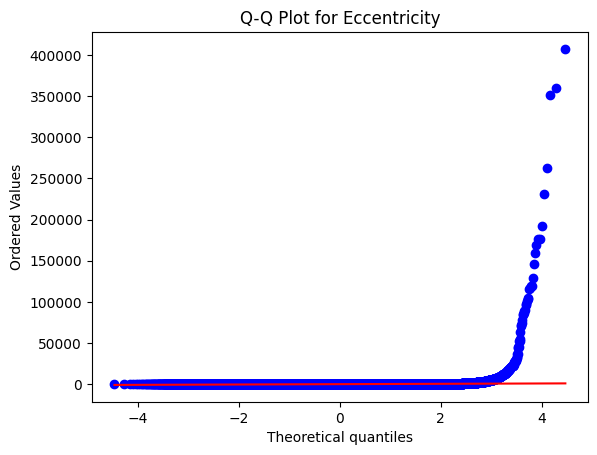

In [78]:
# Q-Q plot
stats.probplot(eccentricity_df['eccentricity'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Eccentricity")
plt.show()

In [79]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(eccentricity_df['eccentricity'])

print(f"Shapiro-Wilk Test p-value: {p_value}")
if p_value > 0.05:
    print("Fail to reject null hypothesis: The data is normally distributed.")
else:
    print("Reject null hypothesis: The data is not normally distributed.")

Shapiro-Wilk Test p-value: 2.7318068650250705e-200
Reject null hypothesis: The data is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 177287.
  res = hypotest_fun_out(*samples, **kwds)


In [80]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(eccentricity_df['eccentricity'], 'norm')

print(f"Kolmogorov-Smirnov Test p-value: {p_value}")
if p_value > 0.05:
    print("Fail to reject null hypothesis: The data is normally distributed.")
else:
    print("Reject null hypothesis: The data is not normally distributed.")

Kolmogorov-Smirnov Test p-value: 0.0
Reject null hypothesis: The data is not normally distributed.


In [81]:
from scipy.stats import anderson

# Perform Anderson-Darling test for normality
result = anderson(eccentricity_df['eccentricity'], dist='norm')

print(f"Anderson-Darling Test statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
if result.statistic < result.critical_values[2]:  # 5% significance level
    print("Fail to reject null hypothesis: The data is normally distributed.")
else:
    print("Reject null hypothesis: The data is not normally distributed.")

Anderson-Darling Test statistic: 65658.81911035051
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Reject null hypothesis: The data is not normally distributed.


##  Monotonic Trends

In [82]:
eccentricity_df['wasRunningRoute'].value_counts()

wasRunningRoute
0.0    134518
1.0     42769
Name: count, dtype: int64

In [83]:
dis_stats = eccentricity_df.groupby(['gameId', 'wasRunningRoute'], dropna=False)['eccentricity'].agg(
    mean='mean',
    median='median',
    std='std',
    count='count'#,
    # min='min',
    # max='max',
    # percentile_25=lambda x: np.percentile(x, 25),
    # percentile_75=lambda x: np.percentile(x, 75),
    # percentile_90=lambda x: np.percentile(x, 90)
)

# print("\n wasRunningRoute vs AHC stats\n")
# print('-----------------------------')
# #: Descriptive Statistics by Custom wasRunningRoute Categories:")
# print(dis_stats)
# print()

In [84]:
# Step 1: Reset index and fill NaN values in the 'wasRunningRoute' column
dis_stats_reset = dis_stats.reset_index()
dis_stats_reset['wasRunningRoute'] = dis_stats_reset['wasRunningRoute'].fillna(0)

# Step 2: Pivot the table to separate 'route_median' and 'nonroute_median'
route_vs_nonroute = (
    dis_stats_reset.pivot(index='gameId', columns='wasRunningRoute', values='median')
    .rename(columns={1.0: 'route_median', 0.0: 'nonroute_median'})
)

# Step 3: Calculate the difference between 'route_median' and 'nonroute_median'
route_vs_nonroute['median_diff'] = route_vs_nonroute['route_median'] - route_vs_nonroute['nonroute_median']

# Step 4: Determine monotonic trend based on the difference (median_diff)
# route_vs_nonroute['monotonic_trend'] = route_vs_nonroute['median_diff'].diff().apply(
#     lambda x: 'Increasing' if x > 0 else 'Decreasing' if x < 0 else 'Stable'
# )

route_vs_nonroute['monotonic_trend'] = route_vs_nonroute['median_diff'].apply(
    lambda x: 'Increasing' if x > 0 else 'Decreasing' if x < 0 else 'Stable'
)

# Step 5: Print the result with the monotonicity column
print("\n Monotonic Trend for each gameId:\n")
print(route_vs_nonroute)

# route_vs_nonroute['monotonic_trend'].value_counts()



 Monotonic Trend for each gameId:

wasRunningRoute  nonroute_median  route_median  median_diff monotonic_trend
gameId                                                                     
2022090800              7.209290      1.313944    -5.895346      Decreasing
2022091100              7.540312      3.007583    -4.532729      Decreasing
2022091101             10.295012      0.988814    -9.306199      Decreasing
2022091102              4.905344      1.594663    -3.310681      Decreasing
2022091103              6.402895      3.607562    -2.795334      Decreasing
2022091104              5.317182      2.543146    -2.774036      Decreasing
2022091105              8.797907      2.127364    -6.670543      Decreasing
2022091106              7.946015      2.800675    -5.145340      Decreasing
2022091107             14.958823      3.280770   -11.678053      Decreasing
2022091108              7.974863      2.105514    -5.869349      Decreasing
2022091109             10.463700      1.960530    -8

In [85]:
# # Count the frequency of each trend type
trend_counts = route_vs_nonroute['monotonic_trend'].value_counts()
trend_counts

monotonic_trend
Decreasing    136
Name: count, dtype: int64

## Hypothesis Testing for Route Types

In [98]:
eccentricity_df.shape

(177287, 32)

In [101]:

route_data.shape
eccentricity_df['routeRan'].unique()

array(['NoRoute', 'IN', 'OUT', 'GO', 'POST', 'FLAT', 'SLANT', 'HITCH',
       'SCREEN', 'ANGLE', 'CROSS', 'CORNER', 'WHEEL'], dtype=object)

In [102]:
from scipy.stats import shapiro

# Group by routeRan and test normality of eccentricity for each route
for route in eccentricity_df['routeRan'].unique():
    route_data = eccentricity_df[eccentricity_df['routeRan'] == route]['eccentricity']
    stat, p_value = shapiro(route_data)
    # print(f"Normality test for route {route} - p-value: {p_value}")
    # print(f"Normality test for route {route} - stat : {stat} p-value: {p_value}")
    print(f"{route} - stat = {stat} p-value = {p_value}")
    # if p_value > 0.05:
        # print(f"Route {route}: Data is likely normal")
    # else:
        # print(f"Route {route}: Data is likely not normal")

NoRoute - stat = 0.009540141497545118 p-value = 1.2893753775871407e-192
IN - stat = 0.08864677124959708 p-value = 1.7031281075812607e-83
OUT - stat = 0.08068398003648558 p-value = 7.541599121700772e-90
GO - stat = 0.035938269360834996 p-value = 3.165013531981438e-107
POST - stat = 0.028436650789466222 p-value = 2.2732557185752694e-79
FLAT - stat = 0.005331879822370711 p-value = 1.292079597023678e-101
SLANT - stat = 0.13577104042617172 p-value = 4.7661507915017004e-73
HITCH - stat = 0.009356850827686225 p-value = 6.5052178427966484e-102
SCREEN - stat = 0.10211854229478479 p-value = 2.7547979779225985e-68
ANGLE - stat = 0.12335388423330762 p-value = 7.437166334540238e-67
CROSS - stat = 0.01162224114965471 p-value = 4.595307502268842e-91
CORNER - stat = 0.03557656087196104 p-value = 3.824298113398988e-70
WHEEL - stat = 0.1520696177052797 p-value = 2.5574646553674228e-30


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 134518.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7804.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6206.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6296.
  res = hypotest_fun_out(*samples, **kwds)


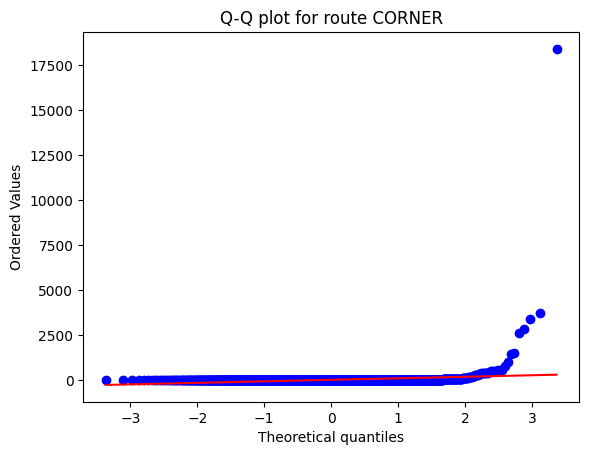

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# For a specific route
route = 'CORNER'  # Example route
route_data = eccentricity_df[eccentricity_df['routeRan'] == route]['eccentricity']

# Q-Q plot
stats.probplot(route_data, dist="norm", plot=plt)
plt.title(f"Q-Q plot for route {route}")
plt.show()

In [104]:
from scipy.stats import levene

# Perform Levene's test for homogeneity of variances across routes
route_groups = [eccentricity_df[eccentricity_df['routeRan'] == route]['eccentricity'] for route in eccentricity_df['routeRan'].unique()]
stat, p_value = levene(*route_groups)

print(f"Levene's test - p-value: {p_value}")
if p_value > 0.05:
    print("Variances are equal (homogeneity of variance assumption is met)")
else:
    print("Variances are not equal (homogeneity of variance assumption is violated)")

Levene's test - p-value: 0.2192544545532867
Variances are equal (homogeneity of variance assumption is met)


In [105]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for homogeneity of variance across routes
route_groups = [eccentricity_df[eccentricity_df['routeRan'] == route]['eccentricity'] for route in eccentricity_df['routeRan'].unique()]
stat, p_value = kruskal(*route_groups)

# print(f"Kruskal-Wallis test - p-value: {p_value}")
print(f"Kruskal-Wallis test - stat: {stat} p-value: {p_value}")

Kruskal-Wallis test - stat: 6807.5399752169615 p-value: 0.0


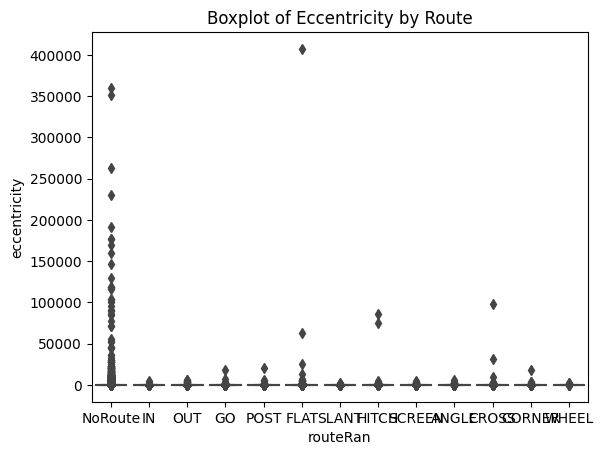

In [106]:
import seaborn as sns

# Create boxplot to visualize potential outliers in eccentricity across routes
sns.boxplot(x='routeRan', y='eccentricity', data=eccentricity_df)
plt.title('Boxplot of Eccentricity by Route')
plt.show()

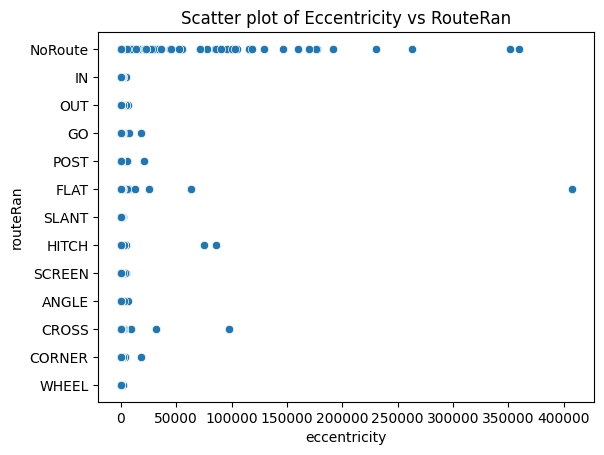

In [107]:
sns.scatterplot(x='eccentricity', y='routeRan', data=eccentricity_df)
plt.title('Scatter plot of Eccentricity vs RouteRan')
plt.show()

In [108]:
import pandas as pd
from scipy.stats import kruskal

# Assuming 'eccentricity_df' is your DataFrame with columns 'routeRan' and 'eccentricity'

# Step 1: Group the data by 'routeRan' and collect the eccentricity values for each route
groups = []
for route in eccentricity_df['routeRan'].unique():
    group_data = eccentricity_df[eccentricity_df['routeRan'] == route]['eccentricity']
    groups.append(group_data)

# Step 2: Perform Kruskal-Wallis H-test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis test p-value: {p_value}")

# Step 3: Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference in eccentricity across different routeRan categories.")
else:
    print("There is no significant difference in eccentricity across different routeRan categories.")

Kruskal-Wallis test p-value: 0.0
There is a significant difference in eccentricity across different routeRan categories.


post hoc

In [110]:
!pip install scikit_posthocs


In [111]:
eccentricity_df.shape

(177287, 32)

In [113]:
from scipy.stats import rankdata

# Post-hoc test (e.g., Dunn's test) to compare pairwise differences
import scikit_posthocs as sp

# Pairwise comparisons using Dunn's test
posthoc = sp.posthoc_dunn(eccentricity_df, val_col='eccentricity', group_col='routeRan')
print(posthoc)

                 ANGLE        CORNER          CROSS           FLAT  \
ANGLE     1.000000e+00  2.176523e-69   6.053587e-84   4.178823e-18   
CORNER    2.176523e-69  1.000000e+00   2.063840e-01   1.432543e-40   
CROSS     6.053587e-84  2.063840e-01   1.000000e+00   2.020224e-57   
FLAT      4.178823e-18  1.432543e-40   2.020224e-57   1.000000e+00   
GO       5.781843e-147  1.881599e-04   4.783461e-12  8.834702e-155   
HITCH    1.986062e-112  4.007345e-01   3.809251e-03   3.147241e-98   
IN       2.363329e-113  5.954177e-03   6.388668e-07   2.247795e-91   
NoRoute   4.389384e-07  2.440651e-88  2.455419e-168   2.011573e-18   
OUT       5.952425e-68  7.933447e-04   7.273651e-03   2.503774e-39   
POST      3.441217e-86  5.882277e-01   3.602618e-02   4.371072e-58   
SCREEN    5.165480e-58  1.374163e-01   6.205690e-01   4.751011e-30   
SLANT     1.751763e-95  2.386143e-02   4.385419e-05   1.199139e-67   
WHEEL     3.989686e-02  5.310149e-10   3.745447e-09   1.946163e-01   

                   

In [97]:
eccentricity_df_6 = eccentricity_df[eccentricity_df['week'] == 6]
eccentricity_df_19 = eccentricity_df[eccentricity_df['week'] != 6]

In [90]:
eccentricity_df['routeRan'].value_counts(normalize=True)

routeRan
NoRoute    0.758758
GO         0.044019
HITCH      0.035513
FLAT       0.035005
OUT        0.024204
CROSS      0.023798
IN         0.019020
POST       0.015235
SLANT      0.012934
CORNER     0.010379
SCREEN     0.010164
ANGLE      0.009730
WHEEL      0.001241
Name: proportion, dtype: float64

# Modelling

## Empirical Model

In [91]:
eccentricity_df_em = eccentricity_df3[eccentricity_df3['isOffense']==True]
eccentricity_df_em.shape

(177287, 32)

In [92]:
## EMPIRICAL MODEL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import pandas as pd

import torch.nn.functional as F


bin_edges = np.unique(np.concatenate([np.linspace(0, 2, 1000), np.linspace(2, 20, 1000)[1:], [20, np.inf]]))

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers

eccentricity_df_em.loc[:, 'routeRan'] = eccentricity_df_below_30['routeRan'].fillna('NoRoute')

eccentricity_df_emn = eccentricity_df_below_30[eccentricity_df_below_30['week'] != 6]

routes = eccentricity_df_below_30_train['routeRan'].unique()


route_probabilities_discretized = {}

for route in eccentricity_df_below_30_train['routeRan'].unique():
    
    route_data = eccentricity_df_below_30_train[eccentricity_df_below_30_train['routeRan'] == route]['eccentricity']

    counts, _ = np.histogram(route_data, bins=bin_edges)

    probabilities = counts / counts.sum() * 100  

    route_probabilities_discretized[route] = probabilities
    


# TEST

eccentricity_df_below_30_test = eccentricity_df_below_30[eccentricity_df_below_30['week'] == 6]

ecc_values_test = eccentricity_df_below_30_test['eccentricity'].tolist()
nflIDS_test = eccentricity_df_below_30_test['nflId'].tolist()

route_taken_test = eccentricity_df_below_30_test['routeRan'].tolist()
route_taken_test = [str(item) for item in route_taken_test]




bin_index = np.digitize(ecc_values_test, bin_edges) - 1

probabilities_for_bin = {route: probabilities[bin_index] for route, probabilities in route_probabilities_discretized.items()}

sum_of_probabilities = sum(probabilities_for_bin.values())

normalized_probabilities = {route: prob / sum_of_probabilities for route, prob in probabilities_for_bin.items()}

sum_of_normalized_probabilities = sum(normalized_probabilities.values())



from tqdm import tqdm

def measure_top_k_accuracy(normalized_probabilities, route_taken_test, k=3):
    # Number of players
    num_players = len(route_taken_test)
    correct_predictions = 0
    
    # Progress bar for processing
    for idx in tqdm(range(num_players), desc="Evaluating accuracy"):
        # Get actual route for the player
        actual_route = route_taken_test[idx]
        
        # Get top-k predicted routes for the player
        index_values = {route: prob[idx] for route, prob in normalized_probabilities.items()}
        top_k_routes = [route for route, _ in sorted(index_values.items(), key=lambda x: x[1], reverse=True)[:k]]
        
        # Check if the actual route is in the top-k predictions
        if actual_route in top_k_routes:
            correct_predictions += 1
    
    # Calculate accuracy
    accuracy = correct_predictions / num_players
    return accuracy

# Measure accuracy
# top_k_accuracy = measure_top_k_accuracy(normalized_probabilities, route_taken_test, k=7)
# print(f"Top-2 Accuracy: {top_k_accuracy:.2%}")

for i in range(len(routes)):
    top_k_accuracy = measure_top_k_accuracy(normalized_probabilities, route_taken_test, k=i+1)
    print(f"Top-2 Accuracy: {top_k_accuracy:.2%}")

Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 158882.82it/s]


Top-2 Accuracy: 2.62%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 154938.81it/s]


Top-2 Accuracy: 7.34%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 155156.19it/s]


Top-2 Accuracy: 36.11%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 151989.13it/s]


Top-2 Accuracy: 46.87%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 152312.30it/s]


Top-2 Accuracy: 55.79%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 148429.49it/s]


Top-2 Accuracy: 64.16%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 148521.28it/s]


Top-2 Accuracy: 71.60%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 145437.69it/s]


Top-2 Accuracy: 78.76%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 144073.08it/s]


Top-2 Accuracy: 86.68%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 140886.13it/s]


Top-2 Accuracy: 93.29%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 144626.10it/s]


Top-2 Accuracy: 97.05%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 142183.02it/s]


Top-2 Accuracy: 99.27%


Evaluating accuracy: 100%|██████████| 18667/18667 [00:00<00:00, 141305.42it/s]

Top-2 Accuracy: 100.00%


## Neural Network Model

In [93]:
import torch.nn as nn

In [94]:
eccentricity_df = eccentricity_df3.copy()

eccentricity_df = eccentricity_df[eccentricity_df['isOffense']==True]
eccentricity_df.shape

(177287, 32)

In [95]:
class MultiHeadRouteClassifier(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, dropout=0.3):
        
        super(MultiHeadRouteClassifier, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.fc_heads = nn.ModuleList([nn.Linear(64, output_dim) for _ in range(num_heads)])
        
        self.dropout = nn.Dropout(p=dropout)
        # self.dropout = nn.Dropout(p=0.15)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.dropout(self.relu(self.bn3(self.fc3(x))))
        
        # Apply on each head
        outputs = [head(x) for head in self.fc_heads]
        
        # Stack outputs and aggregate with max pooling
        stacked_outputs = torch.stack(outputs, dim=0)
        # pooled_output, _ = torch.max(stacked_outputs, dim=0)
        pooled_output = torch.mean(stacked_outputs, dim=0)
        
        return pooled_output


In [96]:
import torch
import torch.nn as nn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Check if CUDA (GPU) is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

eccentricity_df_nn = eccentricity_df.copy()
eccentricity_df_nn['routeRan'] = eccentricity_df_nn['routeRan'].fillna('NoRoute')
eccentricity_df_nn.dropna(subset=['a', 'b', 'c', 'd', 'e', 'f'])  # Drop rows with NaN in features
# Proceed with One-Hot Encoding for the updated 'routeRan' column
encoder = OneHotEncoder(sparse=False)
encoded_routeRan = encoder.fit_transform(eccentricity_df_nn[['routeRan']])
encoded_routeRan_df = pd.DataFrame(encoded_routeRan, columns=encoder.get_feature_names_out(['routeRan']))


print(eccentricity_df_nn['routeRan'].value_counts(dropna=False))

# Concatenate the encoded columns back to the original DataFrame
eccentricity_df_nn = pd.concat([eccentricity_df_nn, encoded_routeRan_df], axis=1)
eccentricity_df_nn = eccentricity_df_nn.dropna(subset=['routeRan'])
# print(eccentricity_df_nn['routeRan'].value_counts(dropna=False))


# Feature and target extraction for the test data (week 6)
test_data = eccentricity_df_nn[eccentricity_df_nn['week'] == 6]
X_test = test_data[['a', 'b', 'c', 'd', 'e', 'f']].fillna(0)  # Fill NaN with 0
y_test = test_data['routeRan']

# Feature and target extraction for the training data (other weeks)
train_data = eccentricity_df_nn[eccentricity_df_nn['week'] != 6]
X_train = train_data[['a', 'b', 'c', 'd', 'e', 'f']].fillna(0)  # Fill NaN with 0
y_train = train_data['routeRan']

# Label Encoding for target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the features and target labels to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

num_classes = torch.unique(y_train_tensor).numel()
# print('num_classes:', num_classes)

model = MultiHeadRouteClassifier(input_dim=X_train_tensor.shape[1], output_dim=num_classes, num_heads=2).to(device)
model.load_state_dict(torch.load('/kaggle/input/model-2025/best_model.pth', map_location=torch.device('cpu')))

# Print label mappings
label_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Label Mappings (Index to Original Label):")
# for index, label in label_mappings.items():
#     print(f"{index}: {label}")

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)


# Evaluate Function
def evaluate_topk_accuracy(model, X_val, y_val, topk=1):
    model.eval()
    with torch.no_grad():
        outputs = model(X_val)
        topk_indices = torch.topk(outputs, topk, dim=1).indices
        correct_topk = torch.any(topk_indices == y_val.view(-1, 1), dim=1)
        return (correct_topk.sum().item() / y_val.size(0)) * 100

# Variables to track best accuracy and epoch
# best_accuracy = 0.0

# Initialize best_accuracy to a very low value
best_accuracy = 0.0

# Training Loop
epochs = 3 #30000 #300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        top1_accuracy = evaluate_topk_accuracy(model, X_test_tensor, y_test_tensor, topk=1)
        top2_accuracy = evaluate_topk_accuracy(model, X_test_tensor, y_test_tensor, topk=2)
        top3_accuracy = evaluate_topk_accuracy(model, X_test_tensor, y_test_tensor, topk=3)

        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Top-1 Accuracy: {top1_accuracy:.2f}%, Top-2 Accuracy: {top2_accuracy:.2f}%, Top-3 Accuracy: {top3_accuracy:.2f}%")


    # Save the model if the accuracy improves
    if top1_accuracy > best_accuracy:
        best_accuracy = top1_accuracy
        # torch.save(model.state_dict(), 'best_model.pth')
        print(f"Model saved at epoch {epoch} with accuracy: {best_accuracy:.2f}%")


    # # Save the model if the accuracy improves
    # # if top1_accuracy > best_accuracy:
    # if top3_accuracy > best_accuracy3:
        
    #     best_accuracy3 = top3_accuracy
    #     torch.save(model.state_dict(), 'temp_dict3mean.pth')
    #     print(f"Model saved at epoch {epoch} with accuracy: {best_accuracy3:.2f}%")


Using device: cpu


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


routeRan
NoRoute    134518
GO           7804
HITCH        6296
FLAT         6206
OUT          4291
CROSS        4219
IN           3372
POST         2701
SLANT        2293
CORNER       1840
SCREEN       1802
ANGLE        1725
WHEEL         220
Name: count, dtype: int64


<ipython-input-96-dc0c6531128d>:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/input/model-2025/best_model.pth', map_location=to

Label Mappings (Index to Original Label):
Epoch 0, Loss: 0.9100, Top-1 Accuracy: 75.26%, Top-2 Accuracy: 81.41%, Top-3 Accuracy: 85.43%
Model saved at epoch 0 with accuracy: 75.26%


<hr>